This notebook is for learning NetworkX package. <br>
Resources: 
* https://networkx.github.io/documentation/stable/tutorial.html#analyzing-graphs
* https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial
* https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/
* https://www.analyticsvidhya.com/blog/2020/04/community-detection-graphs-networks/


NetworkX uses "dictionary of dictionaries of dictionaries" structure which allows fast lookups with sparse storage and attachments of data to edges

In [1]:
import networkx as nx

In [2]:
#create empty graph
G=nx.Graph()

In [14]:
type(G)

networkx.classes.graph.Graph

In [65]:
# can also write or read in common formatj such as GML, GraphML, pickle, LEDA
#nx.write_gml()
#nx.read_gml()

# Nodes

Nodes can be any hashable object, including customized objects - strings, images, XML, other graphs

In [31]:
#add a single node
G.add_node(1)
G.nodes

NodeView((1,))

In [32]:
#add list of nodes
G.add_nodes_from([2,3])
G.nodes

NodeView((1, 2, 3))

In [143]:
#add container of nodes - the nodes of H are now nodes of G
H = nx.path_graph(10)
print(H.nodes)

G.add_nodes_from(H)
G.nodes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

In [49]:
# add_node adds entire object
# add_nodes_from breaks object apart
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'

G.nodes

NodeView((1, 2, 3, 'spam', 's', 'p', 'a', 'm'))

In [144]:
# Add graph H as a node to G. Now have graph of graphs
G.add_node(H)
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, <networkx.classes.graph.Graph object at 0x000001DCA80A0D68>))

In [145]:
# can convert the node objects to integers with:
G=nx.convert_node_labels_to_integers(G)
print(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


# Edges

In [35]:
# add a single edge
G.add_edge(1,2)
G.edges

EdgeView([(1, 2)])

In [36]:
# add single edge from tuple, unpack with '*'
e=(2,3)
G.add_edge(*e)
G.edges

EdgeView([(1, 2), (2, 3)])

In [37]:
# add from list
e1=[(1,2),(1,3)]
G.add_edges_from(e1)
G.edges

EdgeView([(1, 2), (1, 3), (2, 3)])

In [38]:
# An ebunch is an iterable container of edge-tuples
print(H.edges)

G.add_edges_from(H.edges)
G.edges

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

# Removing Nodes and Edges

In [97]:
print(G.nodes);print(G.edges)

G.remove_node(2)
print('\n',G.nodes);print(G.edges)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[1, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 3), (3, 'm')]


In [98]:
G.remove_nodes_from("spam")
print(G.nodes)

[1, 3, 'spam']


In [99]:
print(G.edges)

G.remove_edge(1,3)
print('\n',G.edges)

[(1, 3)]

 []


# Duplicate Handling

In [235]:
G.clear()

If add a node or edge that already exists, NetworkX ignores 

In [3]:
# adding these edges, also adds the nodes
G.add_edges_from([(1, 2), (1, 3)])
print(G.nodes); print(G.edges)

[1, 2, 3]
[(1, 2), (1, 3)]


In [4]:
# Adding nodes and edges that already exist doesn't change graph
G.add_node(1)
G.add_edge(1, 2)

print(G.nodes); print(G.edges)

[1, 2, 3]
[(1, 2), (1, 3)]


# View Graph Properties

these properties of the graph are continuously updated and read-only. Act like dictionaries

In [5]:
# build up graph again
G.add_nodes_from("spam")
G.add_node("spam")
G.add_edge(3,'m')

In [6]:
# Already shown .edges and .nodes
# There's also .number_of_nodes() and .number_of_edges()
print(G.number_of_nodes())
print(G.number_of_edges())

8
3


In [7]:
#adjacency view shows adjacent nodes
print(G.adj)
print('\n',list(G.adj[1]))

#neighbors is similar but different type
print('\n',list(G.neighbors(1)))

{1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}, 'm': {}}, 's': {}, 'p': {}, 'a': {}, 'm': {3: {}}, 'spam': {}}

 [2, 3]

 [2, 3]


In [8]:
# degree view shows the degree of each node
print(G.degree)

[(1, 2), (2, 1), (3, 2), ('s', 0), ('p', 0), ('a', 0), ('m', 1), ('spam', 0)]


In [9]:
# iterate using .items()
for i in G.adj.items():
    print(i)

print("")

for i in G.adj[1].items():
    print(i)

(1, AtlasView({2: {}, 3: {}}))
(2, AtlasView({1: {}}))
(3, AtlasView({1: {}, 'm': {}}))
('s', AtlasView({}))
('p', AtlasView({}))
('a', AtlasView({}))
('m', AtlasView({3: {}}))
('spam', AtlasView({}))

(2, {})
(3, {})


In [10]:
# nbunch - view edges and degree from a subset of nodes
# Either a node or a container of nodes
print(G.edges([2,'m'])) # shows edges from nodes 2 and m
print(G.degree([2,3])) # degree of nodes 2 and 3

[(2, 1), ('m', 3)]
[(2, 1), (3, 2)]


Can also access edges and neighbors with subscripts. These are not read only.

In [11]:
print(G[1]) #sames as G.adj[1]
print('\n', G[1][2]) #same as G.edges[1,2]

{2: {}, 3: {}}

 {}


# Attributes

can be added to graphs, edges and nodes in the form of key/value pair dictionary objects.

In [12]:
# assign attributes to graph
K=nx.Graph(day="Tuesday")
K.graph

{'day': 'Tuesday'}

In [13]:
K.graph['day']="Monday"
K.graph

{'day': 'Monday'}

In [14]:
#assign attribute to a node
K.add_node(1,time='2pm')
K.add_nodes_from([2,3],time='12am')
K.nodes[1]['room']=42
K.nodes.data()

NodeDataView({1: {'time': '2pm', 'room': 42}, 2: {'time': '12am'}, 3: {'time': '12am'}})

In [15]:
#assign attribute to an edge
K.add_edge(1,2,weight=4.7)
K.add_edges_from([(3,4),(4,5),(3,5)],color='red')
K[3][5]['color']='blue'
K.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7}), (3, 4, {'color': 'red'}), (3, 5, {'color': 'blue'}), (4, 5, {'color': 'red'})])

In [16]:
# An attribute can also be any object
import pandas as pd
df = pd.DataFrame([{'a': i, 'b': 2 * i} for i in range(3)])

G.add_edge(8,9, object = df)

print(G.adj[8])

{9: {'object':    a  b
0  0  0
1  1  2
2  2  4}}


In [17]:
# For weighted edges, can also use weight attribute
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
print(FG.adj)

{1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}


In [18]:
# .edges gives just edges. .edges.data includes attribute dictionaries
# .edges.data('attr') includes just attribute value interested in
print(FG.edges)
print('\n',FG.edges.data('weight'))

[(1, 2), (1, 3), (2, 4), (3, 4)]

 [(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)]


# Operations

Many classic graph operations are built in.
- union(G1,G2)           
- disjoint_union(G1,G2) 
- cartesian_product(G1,G2) 
- compose(G1,G2)           - combine graphs identifying nodes common to both
- complement(G)           
- create_empty_copy(G)     - return an empty copy of the same graph class
- to_undirected(G) - return an undirected representation of G
- to_directed(G)   - return a directed representation of G

In [51]:
nx.subgraph(G, [1,2,'m']).nodes

NodeView(('m', 1, 2))

# Analysis

NetworkX also has many analysis algorithms. Will explore these more further down.

In [69]:
print(list(nx.connected_components(G)))
print(sorted(d for n, d in G.degree()))
print(nx.clustering(G))

[{'m', 1, 2, 3}, {'s'}, {'p'}, {'a'}, {'spam'}, {8, 9}]
[0, 0, 0, 0, 1, 1, 1, 1, 2, 2]
{1: 0, 2: 0, 3: 0, 's': 0, 'p': 0, 'a': 0, 'm': 0, 'spam': 0, 8: 0, 9: 0}


In [70]:
dict(nx.all_pairs_shortest_path(G))

{1: {1: [1], 2: [1, 2], 3: [1, 3], 'm': [1, 3, 'm']},
 2: {2: [2], 1: [2, 1], 3: [2, 1, 3], 'm': [2, 1, 3, 'm']},
 3: {3: [3], 1: [3, 1], 'm': [3, 'm'], 2: [3, 1, 2]},
 's': {'s': ['s']},
 'p': {'p': ['p']},
 'a': {'a': ['a']},
 'm': {'m': ['m'], 3: ['m', 3], 1: ['m', 3, 1], 2: ['m', 3, 1, 2]},
 'spam': {'spam': ['spam']},
 8: {8: [8], 9: [8, 9]},
 9: {9: [9], 8: [9, 8]}}

# Directed Graphs

In [19]:
# G is not a directional graph, but can create from G and use both directions
print(G.edges)
DG=nx.DiGraph(G)
print(DG.edges())

[(1, 2), (1, 3), (3, 'm'), (8, 9)]
[(1, 2), (1, 3), (2, 1), (3, 1), (3, 'm'), ('m', 3), (8, 9), (9, 8)]


In [20]:
# If pass in list, directions will follow order of tuples
edgelist = [(0, 1), (1, 2), (2, 3)]
DG = nx.DiGraph(edgelist)
print(DG.edges)

[(0, 1), (1, 2), (2, 3)]


In [21]:
# add weighted edges
DG.add_weighted_edges_from([(1, 2, 0.5), (1,5,0.2), (3, 1, 0.75)])

In [22]:
DG.edges.data()

OutEdgeDataView([(0, 1, {}), (1, 2, {'weight': 0.5}), (1, 5, {'weight': 0.2}), (2, 3, {}), (3, 1, {'weight': 0.75})])

In [23]:
#degree returns sum of in_degree and out_degree
print(DG.out_degree(2))
print(DG.in_degree(2))
print(DG.degree(2))

1
1
2


In [24]:
# return out degree, weighted by weight
DG.out_degree(1, weight='weight')

0.7

In [25]:
# if use neighbors on a DiGraph, will give same result as successors
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))
print(list(DG.predecessors(1)))

[2, 5]
[2, 5]
[0, 3]


In [26]:
# edges on a DiGraph will give same result as out_edges
print(DG.out_edges(1))
print(DG.edges(1))
print(DG.in_edges(1))

[(1, 2), (1, 5)]
[(1, 2), (1, 5)]
[(0, 1), (3, 1)]


# Multigraphs

Multigraphs allow multiple edges between pairs of nodes

In [27]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])

{1: 1.25, 2: 1.75, 3: 0.5}

In [28]:
# Some algorithms are not well defined for multigraphs and aren't available
# degree is:
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [35]:
# for algorithms that aren't well defined on multigraphs, 
# convert to a regular graph first in a meaningful way
# ex. shortest path where keep edge with lowest weight
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)


[1, 2, 3]

# Generating Graphs

Some classic graphs are included in the package: petersen, tutte, sedgewick maze, tetrahedral

In [45]:
tet = nx.tetrahedral_graph()
tet.graph

{'name': 'Platonic Tetrahedral graph'}

also classic constructive graph generators for the larger ones like: complete, bipartite, barbell, lollipop

In [46]:
K_5 = nx.complete_graph(5)
lollipop = nx.lollipop_graph(10, 20)

And classic stochastic graph generators: erods-renyi, watts-strogatz, barabasi-albert, and random lobster

In [47]:
red = nx.random_lobster(100, 0.9, 0.9)

# Drawing

NetworkX is built for analysis, not graph visualization. But works with Matplotlib and Graphiz

In [71]:
import matplotlib.pyplot as plt

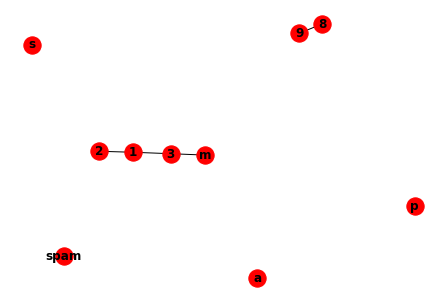

In [83]:
nx.draw(G, with_labels=True, font_weight='bold')

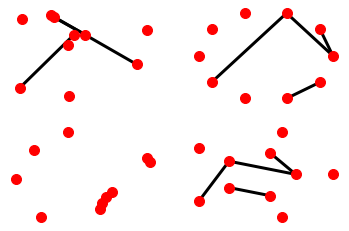

In [106]:
# can specify different layouts
options = {
    'node_color': 'red',
    'node_size': 100,
    'width': 3,
}

plt.subplot(221)
nx.draw_random(G, **options)

plt.subplot(222)
nx.draw_circular(G, **options)

plt.subplot(223)
nx.draw_spring(G, **options)

plt.subplot(224)
nx.draw_shell(G,nlist=[[1,2,3,8,9],['s','p','a','m','spam']], **options)

# More Functions
degree_histogram
density
add_cycle

https://networkx.github.io/documentation/stable/reference/functions.html



# More Algorithms
https://networkx.github.io/documentation/stable/reference/algorithms/index.html
use graph generators and airlines and test -
https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/
degree centrality
closeness centrality
betweenness centrality

breadth first search
depth first search

shortest path
topological sort
bridges
cycle
pagerank
edit_distance


In [ ]:
keep applications pretty simple, sticking to networkX package. 
EoN is where want to get more involved 

# Application - shortest flight path
https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/
    

In [ ]:
# Application - Postman Problem
https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial
    

In [ ]:
# Application community detection with Girvan-Newman
https://www.analyticsvidhya.com/blog/2020/04/community-detection-graphs-networks/